# Lane Line Detection Project using OpenCv ans Python

In [12]:
import numpy as np
import pandas as pd
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

## 1. Data

In [13]:
!git clone https://github.com/udacity/CarND-LaneLines-P1.git

Cloning into 'CarND-LaneLines-P1'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 265 (delta 2), reused 7 (delta 1), pack-reused 254
Receiving objects: 100% (265/265), 43.45 MiB | 42.45 MiB/s, done.
Resolving deltas: 100% (123/123), done.


In [14]:
from distutils.dir_util import copy_tree
import shutil
copy_tree("./CarND-LaneLines-P1/test_images", "./test_images")
copy_tree("./CarND-LaneLines-P1/test_videos", "./test_videos")
shutil.rmtree('./CarND-LaneLines-P1', ignore_errors=False, onerror=None)

In [15]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

array([[[179, 196, 212],
        [140, 161, 178],
        [132, 156, 180],
        ...,
        [133, 155, 178],
        [144, 159, 180],
        [183, 196, 213]],

       [[140, 161, 180],
        [143, 165, 186],
        [133, 161, 185],
        ...,
        [135, 159, 185],
        [141, 159, 181],
        [145, 162, 180]],

       [[131, 157, 180],
        [133, 161, 185],
        [126, 160, 187],
        ...,
        [129, 156, 185],
        [134, 158, 184],
        [131, 153, 176]],

       ...,

       [[120, 121, 126],
        [ 91,  92,  97],
        [ 83,  84,  89],
        ...,
        [ 88,  89,  93],
        [ 94,  95,  99],
        [120, 121, 125]],

       [[138, 139, 143],
        [105, 106, 110],
        [ 89,  90,  95],
        ...,
        [ 97,  98, 100],
        [109, 110, 112],
        [139, 140, 142]],

       [[180, 181, 185],
        [140, 141, 145],
        [117, 118, 123],
        ...,
        [122, 123, 125],
        [140, 141, 143],
        [179, 180, 182]]], dtype=uint8)
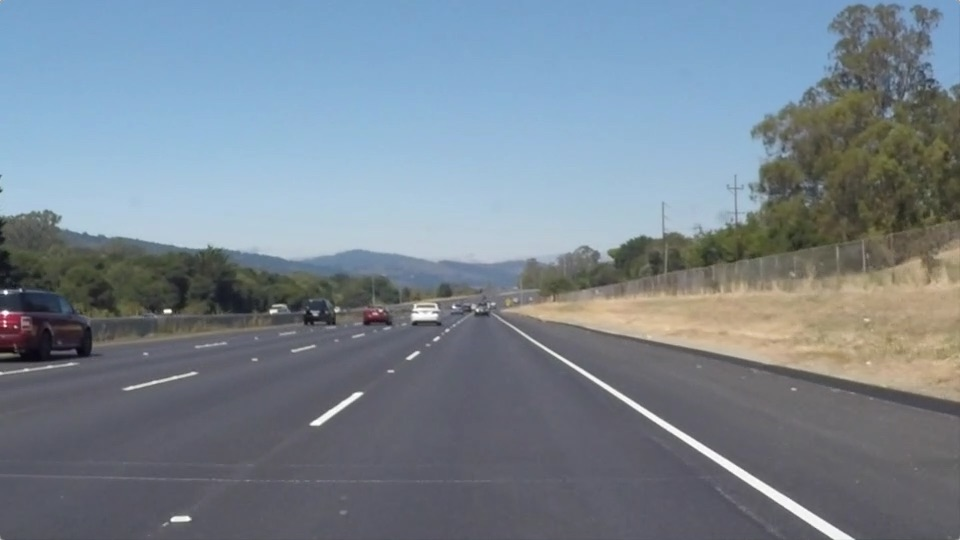

In [16]:
image

## 2. Pipeline

### 2.1 Color Selection

In [17]:
ysize = image.shape[0]
xsize = image.shape[1]

In [18]:
color_select = np.copy(image)

In [19]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200

In [20]:
rgb_threshold = [red_threshold,green_threshold,blue_threshold]

In [21]:
thresholds = (image[:,:,0]< rgb_threshold[0]) | (image[:,:,1]< rgb_threshold[1]) | (image[:,:,2]< rgb_threshold[2])

In [22]:
color_select[thresholds] = [0,0,0]

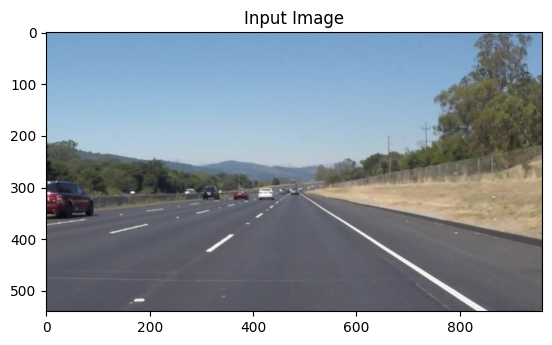

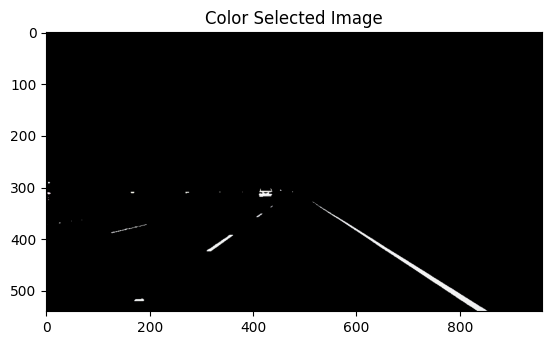

In [23]:
#display the image
plt.imshow(image)
plt.title('Input Image')
plt.show()
plt.imshow(color_select)
plt.title('Color Selected Image')
plt.show()

### 2.2 Masking

In [25]:
image = mpimg.imread('test_images/solidWhiteRight.jpg')

In [26]:
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

In [27]:
red_threshold = 200
green_threshold = 200
blue_threshold = 200

In [28]:
rgb_threshold = [red_threshold, green_threshold, blue_threshold]

In [29]:
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

In [30]:
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

In [31]:
#fit_left

In [32]:
color_thresholds = (image[:,:,0]< rgb_threshold[0]) |\
                   (image[:,:,1]< rgb_threshold[1]) |\
                   (image[:,:,2]< rgb_threshold[2])

In [33]:
# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0,xsize),np.arange(0,ysize))

In [34]:
region_thresholds =  (YY > (XX*fit_left[0] + fit_left[1] )) & \
                     (YY > (XX*fit_right[0] + fit_right[1] )) & \
                     (YY < (XX*fit_bottom[0] + fit_bottom[1] )
                     )

In [35]:
# Mask Color and Region selection
color_select[color_thresholds | ~region_thresholds] = [0,0,0]

In [36]:
line_image[~color_thresholds & region_thresholds] = [9, 255, 0]

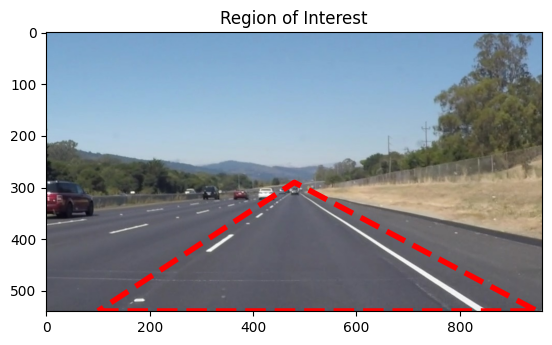

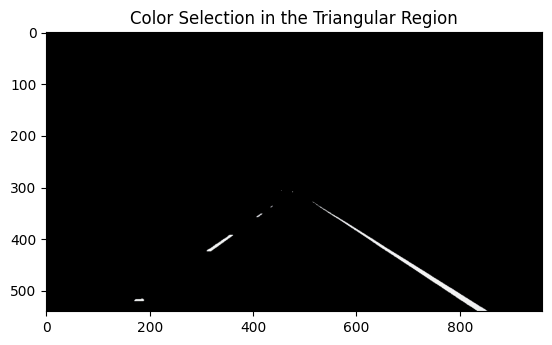

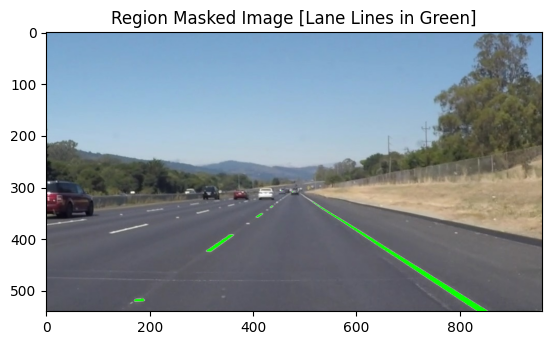

In [37]:
# Display the image and region of color selection
plt.imshow(image)
x = [left_bottom[0], right_bottom[0],apex[0],left_bottom[0] ]
y = [left_bottom[1], right_bottom[1],apex[1],left_bottom[1] ]
plt.plot(x,y,'r--',lw = 4)
plt.title('Region of Interest')
plt.show()

plt.imshow(color_select)
plt.title("Color Selection in the Triangular Region")
plt.show()

plt.imshow(line_image)
plt.title("Region Masked Image [Lane Lines in Green]")
plt.show()

## 3. Test the Code

In [38]:
image = mpimg.imread('test_images/solidYellowLeft.jpg')

In [39]:
#grab the x and y size of image and make a copy of it.7
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

In [40]:
# Define the color scheme criteria
red_threshold = 200
blue_threshold = 200
green_threshold = 200

In [41]:
rgb_threshold = [red_threshold,blue_threshold,green_threshold]

In [42]:
# Define the vertices for tringular mask
left_bottom = [100, 539]
right_bottom = [950, 539]
apex = [480, 290]

In [43]:
# perform a polyfit to get the lines.
fit_left = np.polyfit((left_bottom[0],apex[0]),(left_bottom[1],apex[1]),1)
fit_right = np.polyfit((right_bottom[0],apex[0]),(right_bottom[1],apex[1]),1)
fit_bottom = np.polyfit((left_bottom[0],right_bottom[0]),(left_bottom[1],right_bottom[1]),1)

In [44]:
color_thresholds = (image[:,:,0] < rgb_threshold[0]) | \
                   (image[:,:,1] < rgb_threshold[1]) | \
                   (image[:,:,2] < rgb_threshold[2])

In [45]:
print(color_thresholds)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [46]:
#Find the region inside the lines

XX, YY = np.meshgrid(np.arange(0,xsize),np.arange(0, ysize))

In [47]:
## Craete region threshold
region_thresholds = (YY > (XX * fit_left[0] + fit_left[1])) & \
                    (YY > (XX * fit_right[0] + fit_right[1])) & \
                    (YY < (XX * fit_bottom[0] + fit_bottom[1]))

In [48]:
color_select[color_thresholds | ~region_thresholds ] = [0,0,0]

In [49]:
# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds ] = [9, 255, 0]

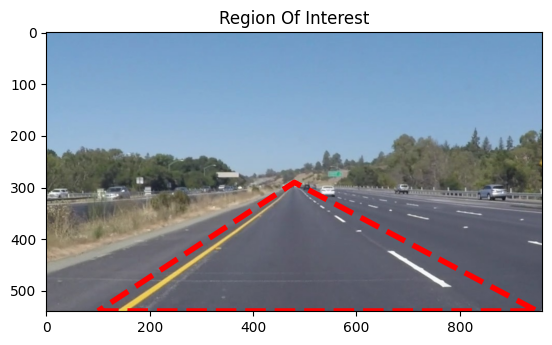

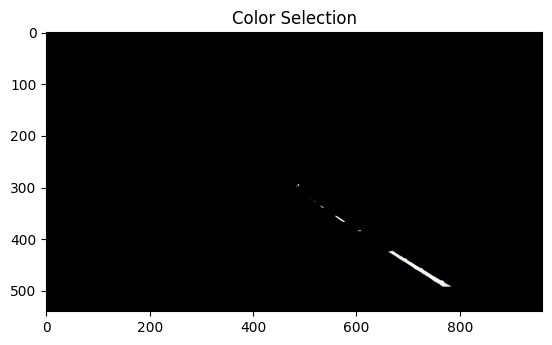

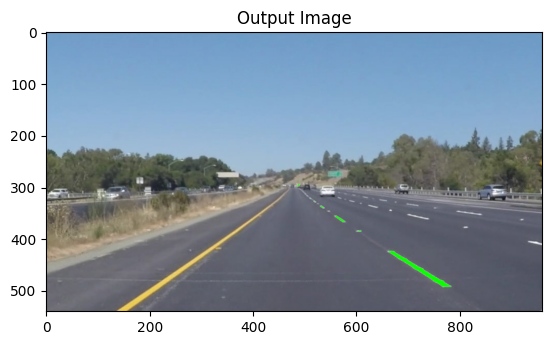

In [50]:
# Display the image and show region and color selections
plt.imshow(image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'r--', lw=4)
plt.title("Region Of Interest")
plt.show()
plt.imshow(color_select)
plt.title("Color Selection")
plt.show()
plt.imshow(line_image)
plt.title("Output Image")
plt.show()

## Canny Edge Detector

In [51]:
import cv2

In [52]:
# Read the image and convert it to grayscale
image = mpimg.imread('test_images/solidYellowLeft.jpg')

In [53]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [54]:
# Define a kernal size for gaussian smooting
kernal_size = 5 #must be an odd number
blur_gray = cv2.GaussianBlur(gray,(kernal_size,kernal_size),0)

array([[161, 158, 154, ..., 151, 156, 159],
       [158, 156, 153, ..., 150, 153, 156],
       [154, 153, 151, ..., 146, 148, 150],
       ...,
       [123, 120, 114, ...,  91, 100, 105],
       [132, 127, 119, ..., 100, 113, 120],
       [137, 132, 122, ..., 105, 120, 128]], dtype=uint8)
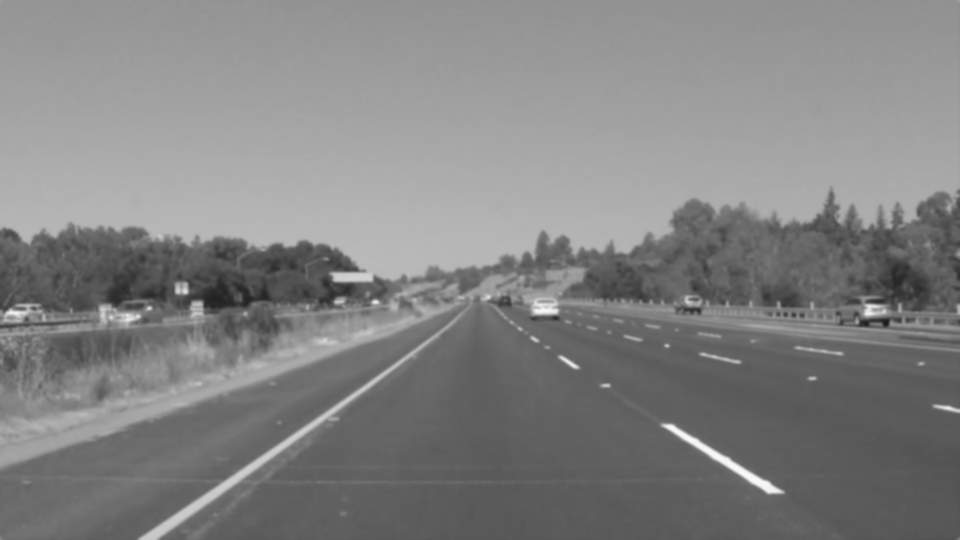

In [55]:
blur_gray

In [56]:
# define th canny parameters and run canny from it
low_threshold = 180
high_threshold = 240

edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

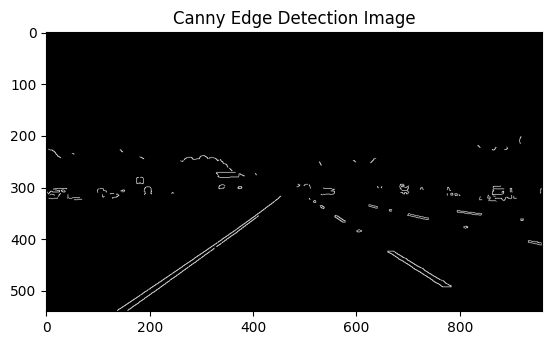

In [57]:
# Display the images
plt.imshow(edges, cmap = 'Greys_r')
plt.title("Canny Edge Detection Image")
plt.show()

## Hough Transform and detecting lane lines

In [58]:
## Create masked images using cv2
mask = np.zeros_like(edges)
ignote_mask_color = 255


In [59]:
# define a four sided ploygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(450,290),(490,290),(imshape[1],imshape[0])]], dtype = np.int32)
cv2.fillPoly(mask,vertices,ignote_mask_color)
masked_edges = cv2.bitwise_and(edges,mask)

In [60]:
# define the Hough transform parameters
# make a blank  size image to draw on
rho = 1 # distance resolution in pixels of the Hough grid
theta = np.pi/180
threshold = 2 # minimum number of votes (intersections in Hough grid cell)
min_line_length = 4 #min number of pixels making a line
max_line_gap = 5 #maximum gap in pixels between connected line segments
line_image = np.copy(image)*0  #creating a blank window to draw line on

In [61]:
#Run Hough on edge detected image
# Output lines
lines = cv2.HoughLinesP(masked_edges,rho,theta,threshold,np.array([]),min_line_length,max_line_gap)

In [62]:
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
  for x1, y1,x2,y2 in line:
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges,edges,edges))

In [63]:
## Plot the final result and draw the lines
lines_edges = cv2.addWeighted(color_edges,0.8,line_image,1,0)
lines_edges = cv2.polylines(lines_edges,vertices, True, (0,0,255), 10)

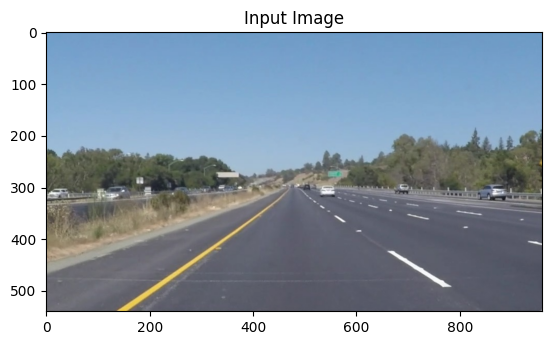

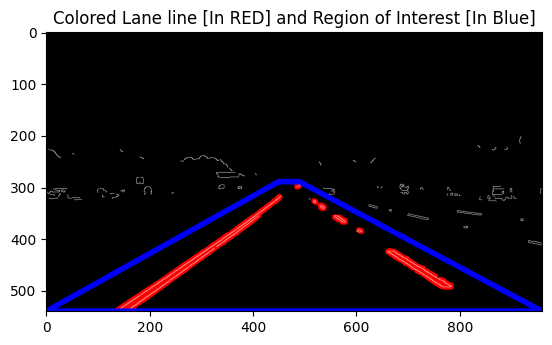

In [64]:
plt.imshow(image)
plt.title("Input Image")
plt.show()
plt.imshow(lines_edges)
plt.title("Colored Lane line [In RED] and Region of Interest [In Blue]")
plt.show()

# Data Pipeline

1.   Gray Scale
2.   Gaussian Smoothing
3.   Canny Edge Detection
4. Region Masking
5. Hough Tranform
6. Draw lines




In [161]:
import math
def grayscale(img):
  return cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


# # Apply the Canny Transformers

def canny(img, low_threshold, high_threshold):
  return cv2.Canny(img,low_threshold,high_threshold)



#Apply Gaussian Kernal Noise


def gaussian_blur(img,kernel_size):
  return cv2.GaussianBlur(gray,(kernal_size,kernel_size),0)


# Region of Interest

def region_of_interest(img, vertices):
  #defining a blank mask to start with
  mask = np.zeros_like(img)

    #defining a 3 channel or 1 channel color to fill the mask with depending on the input image

  if len(img.shape) > 2:
      channel_count = img.shape[2]
      ignore_mask_color = (255,)*channel_count

  else :
      ignore_mask_color = 255

    #filling pixels inside the polygon defined by "vertices" with the fill color

  cv2.fillPoly(mask,vertices,ignore_mask_color)

    #returning the image only where mask pixels are nonzero
  masked_image = cv2.bitwise_and(img,mask)

  return masked_image



def draw_lines(img,lines, color=[255,0,0],thickness = 10):
  for line in lines:
    for x1,y1,x2,y2 in line:
      cv2.line(img,(x1,y1),(x2,y2),color,thickness)



def slope_lines(image, lines):
  img = image.copy()
  poly_vertices = []
  order = [0,1,3,2]

  left_lines = []
  right_lines = []


  for line in lines:
    for x1,y1,x2,y2 in line:
      if x1 == x2:
        pass # vertical lines

      else:
        m = (y2-y1)/(x2-x1)
        c = y1 - m*x1

        if m < 0:
          left_lines.append((m,c))
        elif m >= 0:
          right_lines.append((m,c))


  left_line = np.mean(left_lines, axis = 0)
  right_line = np.mean(right_lines, axis = 0)
  #   #print(left_line, right_line)

  for slope , intercept in [left_line, right_line]:
    print(f"Slope: {slope}, Intercept: {intercept}")
    rows, cols = image.shape[:2]
    y1 = int(rows)
    y2 = int(rows*0.6)

    x1 = int((y1-intercept)/slope)
    x2 = int((y2-intercept)/slope)

    poly_vertices.append((x1,y1))
    poly_vertices.append((x2,y2))

    draw_lines(img,np.array([[[x1,y1,x2,y2]]]))

  poly_vertices = [poly_vertices[i] for i in order]
  cv2.fillPoly(img, pts=np.array([poly_vertices], 'int32'), color=(0, 255, 0))
  return cv2.addWeighted(image, 0.7, img,0.4,0)


def hough_lines(img, rho, theta, threshold,min_line_len, max_line_gap):
  lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength = min_line_len, maxLineGap = max_line_gap)
  #img should be the output of Canny Transform
  line_img = np.zeros((img.shape[0],img.shape[1],3),dtype = np.uint8)
  #draw lines(line_img,lines)
  line_img = slope_lines(line_img,lines)
  return line_img



def weighted_img(img,initial_img, α = 0.1, β = 1,γ = 0):
  lines_edges = cv2.addWeighted(initial_img,α,img,β,γ)
  return lines_edges







def get_vertices(image):
    rows, cols = image.shape[:2]
    bottom_left  = [cols*0.15, rows]
    top_left     = [cols*0.45, rows*0.6]
    bottom_right = [cols*0.95, rows]
    top_right    = [cols*0.55, rows*0.6]

    ver = np.array([[bottom_left, top_left, top_right, bottom_right]], dtype=np.int32)
    return ver

In [188]:
# Lane Finding Pipeline
def lane_finding_pipeline(image):
  #Grayscale
  gray_image = grayscale(image)

  #Gaussian Smoothing
  smoothed_img = gaussian_blur(img = gray_image, kernel_size=5)

  #Canny Edge Detection
  canny_img = canny(img = smoothed_img,low_threshold=180,high_threshold=240)

  #masked image
  masked_img = region_of_interest(img=canny_img,vertices = get_vertices(image))
  #Hough Transform
  houghed_lines = hough_lines(img = masked_img, rho = 1, theta = np.pi/180, threshold = 20, min_line_len = 20, max_line_gap = 180)
  #Draw line on edges
  output = weighted_img(img = houghed_lines, initial_img = image, α=0.8, β=1., γ=0.)
  return output



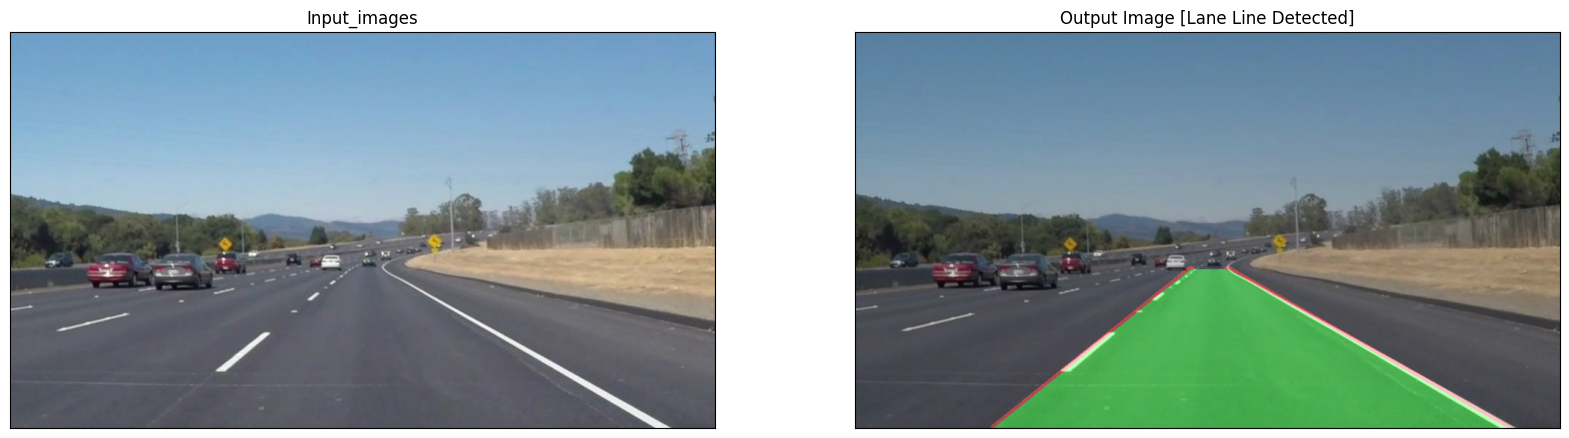

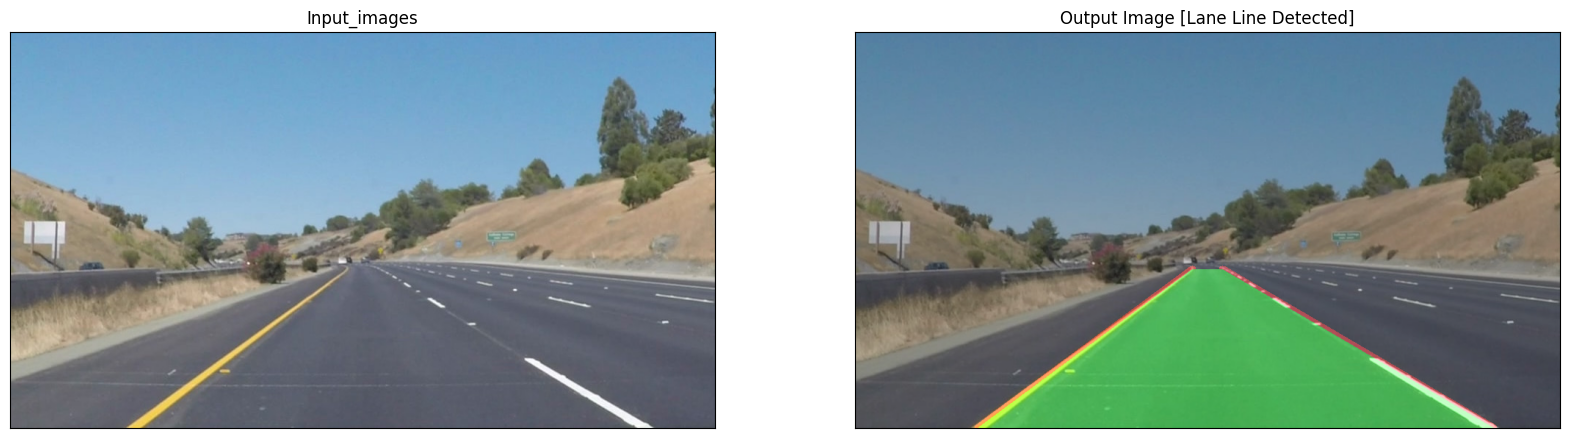

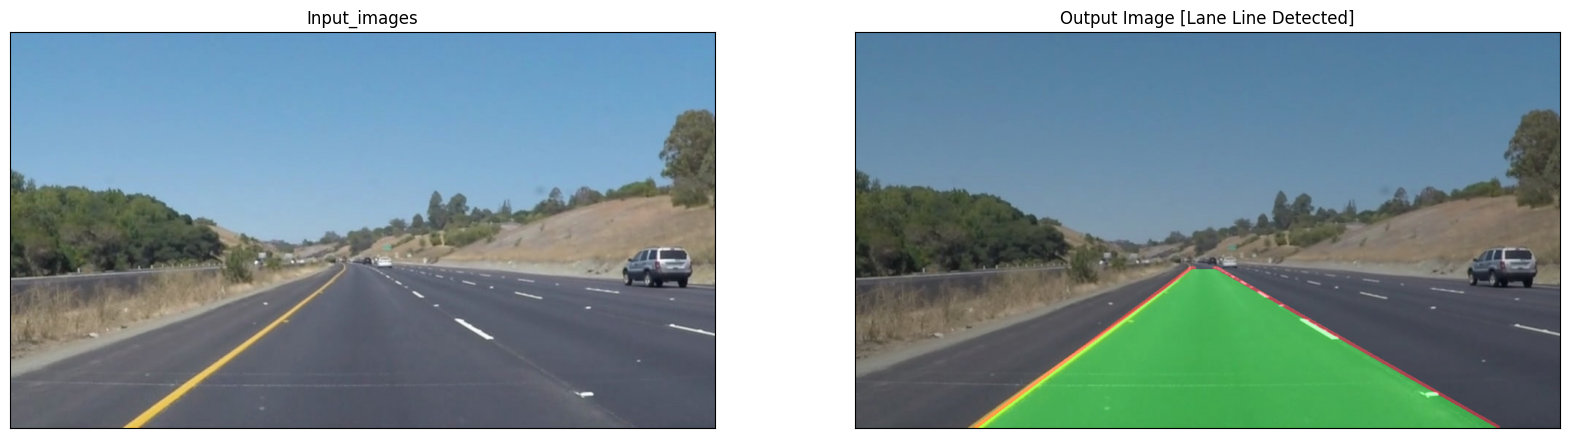

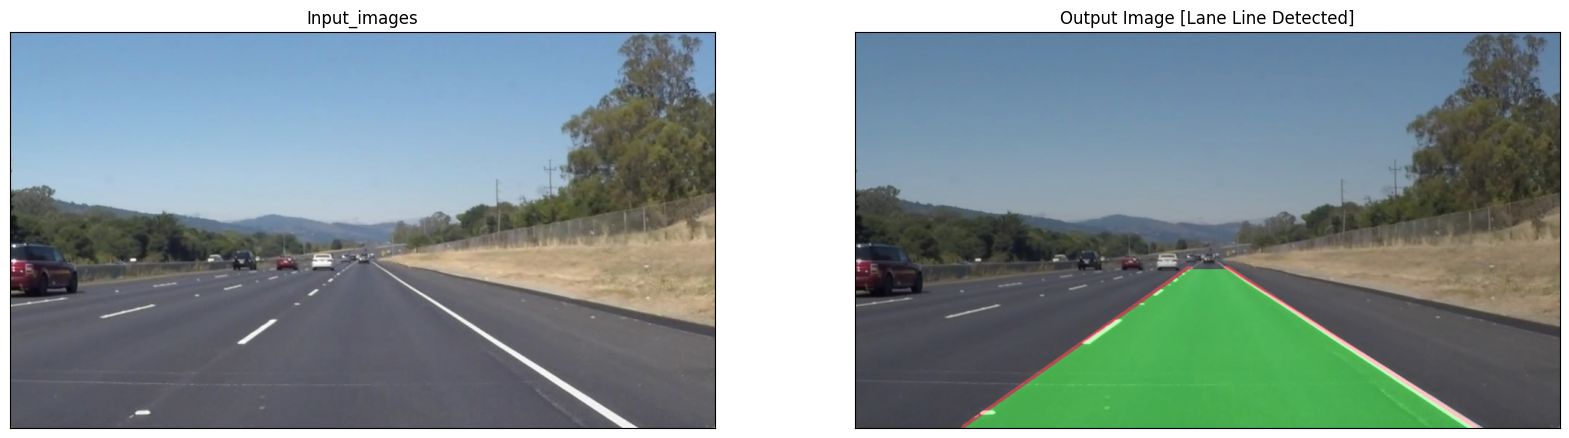

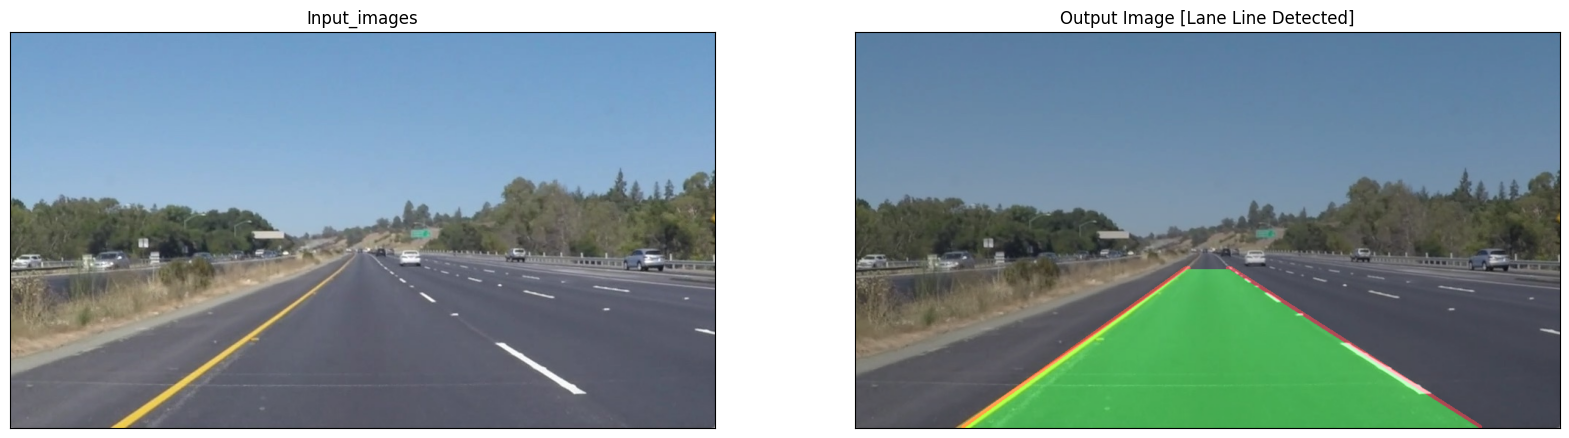

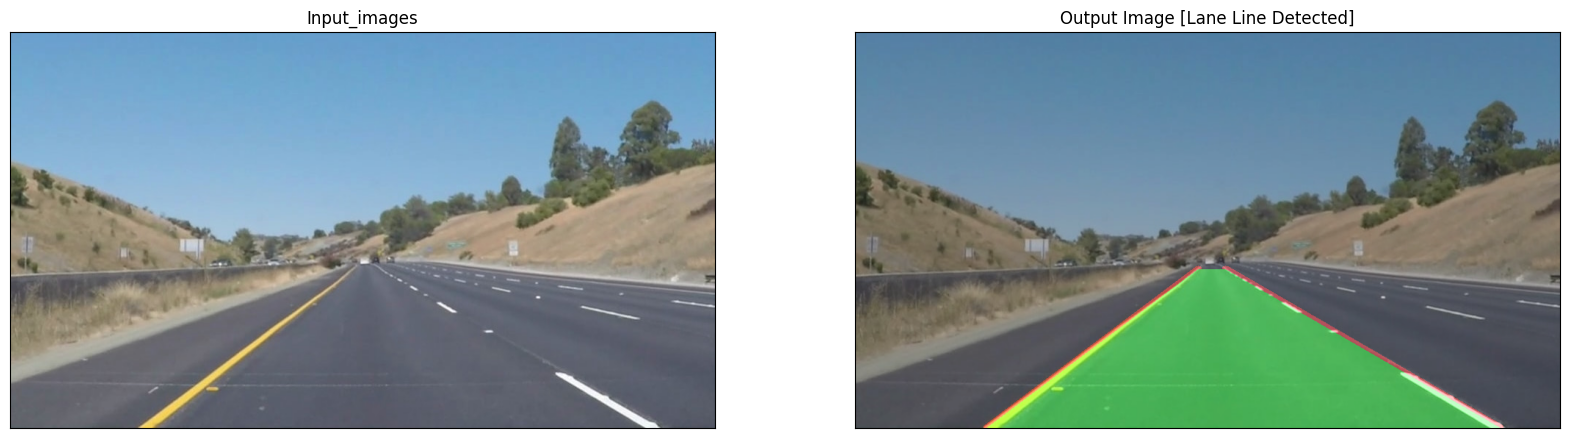

In [189]:
for image_path in list(os.listdir('./test_images')):
  fig = plt.figure(figsize = (20,10))
  image = mpimg.imread(f'./test_images/{image_path}')
  ax = fig.add_subplot(1,2,1,xticks=[],yticks = [])
  plt.imshow(image)
  ax.set_title('Input_images')
  ax = fig.add_subplot(1,2,2,xticks=[],yticks = [])
  plt.imshow(lane_finding_pipeline(image))
  ax.set_title("Output Image [Lane Line Detected]")
  plt.show()

In [190]:
!pip install moviepy

In [191]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [192]:
white_output = './solidWhiteRight.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
#clip1 = VideoFileClip("test_videos/jaipurHighway.mp4").subclip(50,60)
clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4")
white_clip = clip1.fl_image(lane_finding_pipeline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

Moviepy - Building video ./solidWhiteRight.mp4.
Moviepy - Writing video ./solidWhiteRight.mp4



Moviepy - Done !
Moviepy - video ready ./solidWhiteRight.mp4
CPU times: user 2.77 s, sys: 465 ms, total: 3.23 s
Wall time: 17.1 s


In [193]:
HTML("""
<video width="960" height="500" controls>
  <source src="{0}">
</video>
""".format(white_output))

In [194]:
yellow_output = './solidYellowLeft.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4').subclip(0,5)
clip2 = VideoFileClip('test_videos/solidYellowLeft.mp4')
yellow_clip = clip2.fl_image(lane_finding_pipeline)
%time yellow_clip.write_videofile(yellow_output, audio=False)

Moviepy - Building video ./solidYellowLeft.mp4.
Moviepy - Writing video ./solidYellowLeft.mp4



Moviepy - Done !
Moviepy - video ready ./solidYellowLeft.mp4
CPU times: user 8.25 s, sys: 1.28 s, total: 9.53 s
Wall time: 43.7 s


In [195]:
HTML("""
<video width="960" height="500" controls>
  <source src="{0}">
</video>
""".format(yellow_output))